# Cattle disease prediction using Machine Learning

In [1]:
#Importing libraries and packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle

In [2]:
#List of the all symptoms is listed here in list l1.

l1=['anorexia','abdominal_pain','anaemia','abortions','acetone','aggression','arthrogyposis',
    'ankylosis','anxiety','bellowing','blood_loss','blood_poisoning','blisters','colic','Condemnation_of_livers',
    'coughing','depression','discomfort','dyspnea','dysentery','diarrhoea','dehydration','drooling',
    'dull','decreased_fertility','diffculty_breath','emaciation','encephalitis','fever','facial_paralysis','frothing_of_mouth',
    'frothing','gaseous_stomach','highly_diarrhoea','high_pulse_rate','high_temp','high_proportion','hyperaemia','hydrocephalus',
    'isolation_from_herd','infertility','intermittent_fever','jaundice','ketosis','loss_of_appetite','lameness',
    'lack_of-coordination','lethargy','lacrimation','milk_flakes','milk_watery','milk_clots',
    'mild_diarrhoea','moaning','mucosal_lesions','milk_fever','nausea','nasel_discharges','oedema',
    'pain','painful_tongue','pneumonia','photo_sensitization','quivering_lips','reduction_milk_vields','rapid_breathing',
    'rumenstasis','reduced_rumination','reduced_fertility','reduced_fat','reduces_feed_intake','raised_breathing','stomach_pain',
    'salivation','stillbirths','shallow_breathing','swollen_pharyngeal','swelling','saliva','swollen_tongue',
    'tachycardia','torticollis','udder_swelling','udder_heat','udder_hardeness','udder_redness','udder_pain','unwillingness_to_move',
    'ulcers','vomiting','weight_loss','weakness']

In [3]:
#List of Diseases (26 Cattle Diseases Mention) is listed in list disease.

disease=['mastitis','blackleg','bloat','coccidiosis','cryptosporidiosis',
        'displaced_abomasum','gut_worms','listeriosis','liver_fluke','necrotic_enteritis','peri_weaning_diarrhoea',
        ' rift_valley_fever','rumen_acidosis',
        'traumatic_reticulitis','calf_diphtheria','foot_rot','foot_and_mouth','ragwort_poisoning','wooden_tongue','infectious_bovine_rhinotracheitis',
'acetonaemia','fatty_liver_syndrome','calf_pneumonia','schmallen_berg_virus','trypanosomosis','fog_fever']

#disease = [df['prognosis'].unique()]
#print(disease)

In [4]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
#Reading the Cattle training Dataset .csv file
df=pd.read_csv("training.csv")
DF= pd.read_csv('training.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
#df.head()
DF.head()

C:\Users\win11\AppData\Local\Temp\ipykernel_37044\3503920851.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,


,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_swelling,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness
prognosis,,,,,,,,,,,,,,,,,,,,,
mastitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   anorexia                2044 non-null   int64
 1   abdominal_pain          2044 non-null   int64
 2   anaemia                 2044 non-null   int64
 3   abortions               2044 non-null   int64
 4   acetone                 2044 non-null   int64
 5   aggression              2044 non-null   int64
 6   arthrogyposis           2044 non-null   int64
 7   ankylosis               2044 non-null   int64
 8   anxiety                 2044 non-null   int64
 9   bellowing               2044 non-null   int64
 10  blood_loss              2044 non-null   int64
 11  blood_poisoning         2044 non-null   int64
 12  blisters                2044 non-null   int64
 13  colic                   2044 non-null   int64
 14  Condemnation_of_livers  2044 non-null   int64
 15  conjunctivae         

In [7]:
import math

def plotPerColumnDistribution(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(math.ceil(nCol / n_graph_per_row))
    plt.figure(num=None, figsize=(6 * n_graph_per_row, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(nCol, n_graph_shown)):
        plt.subplot(nGraphRow, n_graph_per_row, i + 1)
        sns.histplot(df.iloc[:, i], kde=True)
        plt.xlabel(columnNames[i])
        plt.ylabel('Count')
    plt.show()

In [8]:
def plotScatterMatrix(df, plotSize=10, textSize=10):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    df = df.dropna(axis='columns')  # drop columns with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns with more than 1 unique value
    
    columnNames = list(df.columns)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    
    df = df[columnNames]
    
    if isinstance(plotSize, (int, float)) and plotSize > 0:
        figsize = (plotSize, plotSize)
    else:
        raise ValueError("plotSize must be a positive integer or float.")
    
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=figsize, diagonal='kde')
    
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), 
                          xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

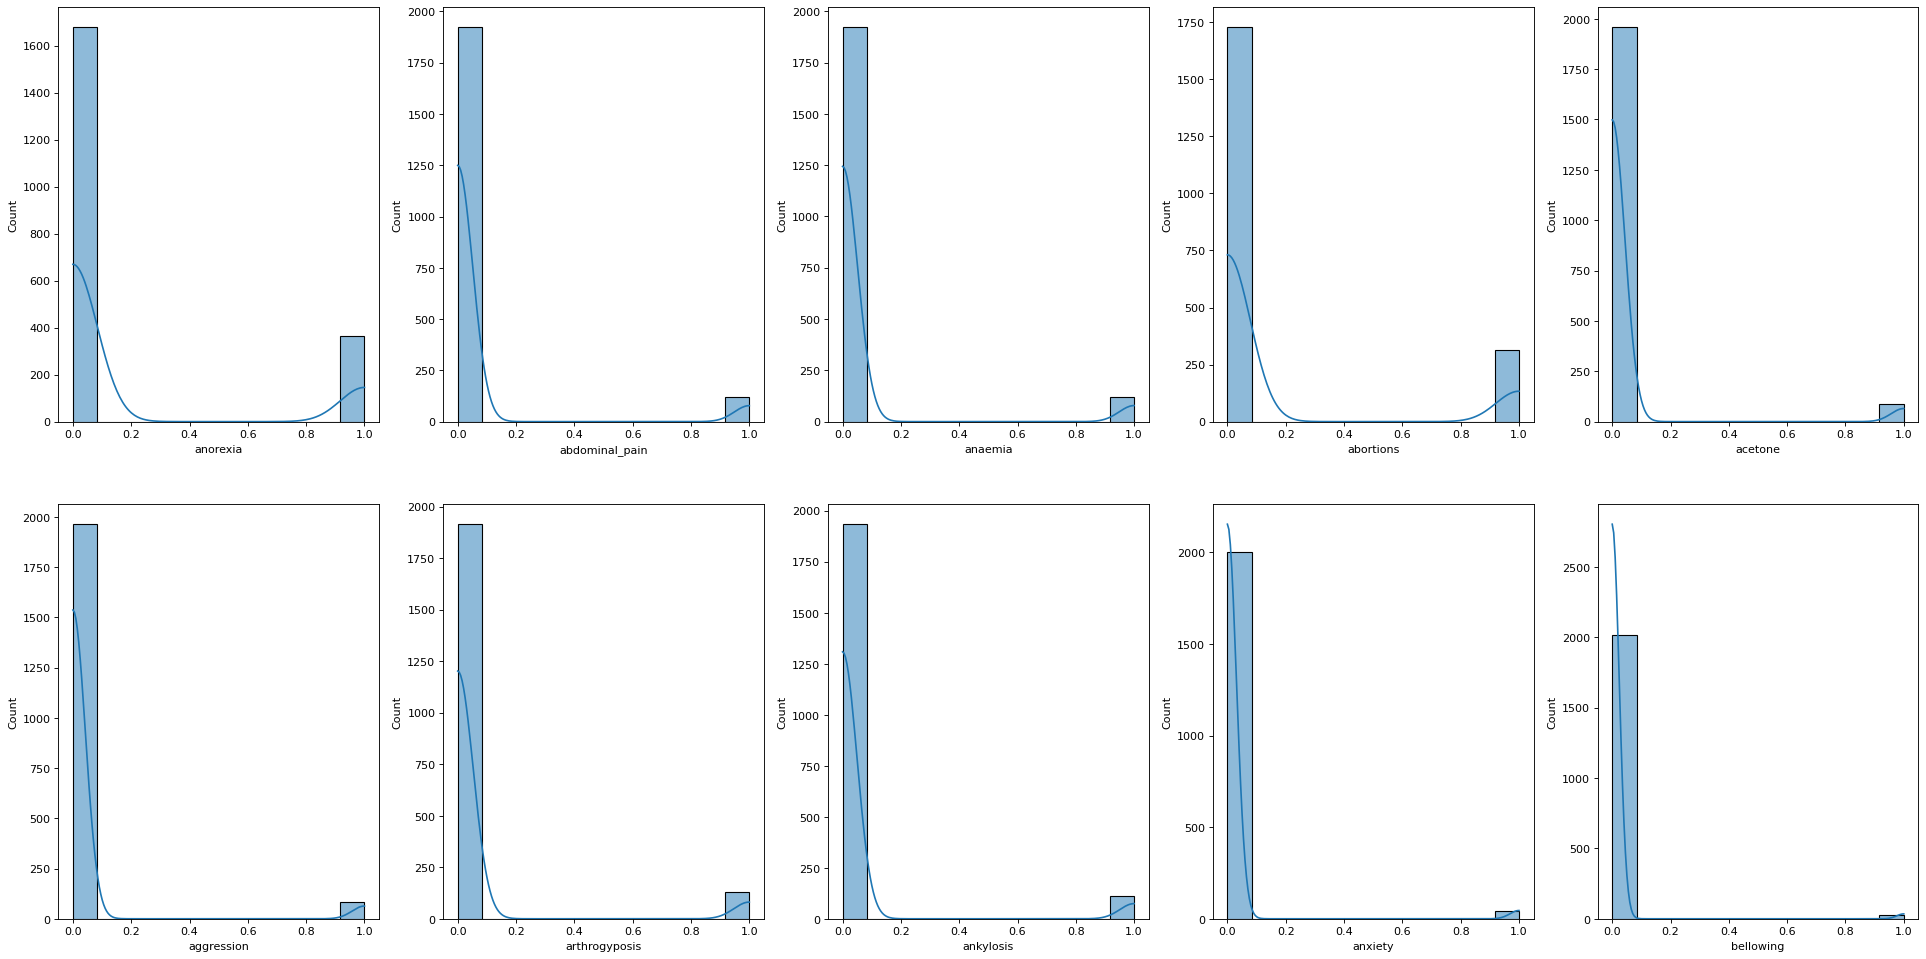

In [9]:
plotPerColumnDistribution(df, 10, 5)

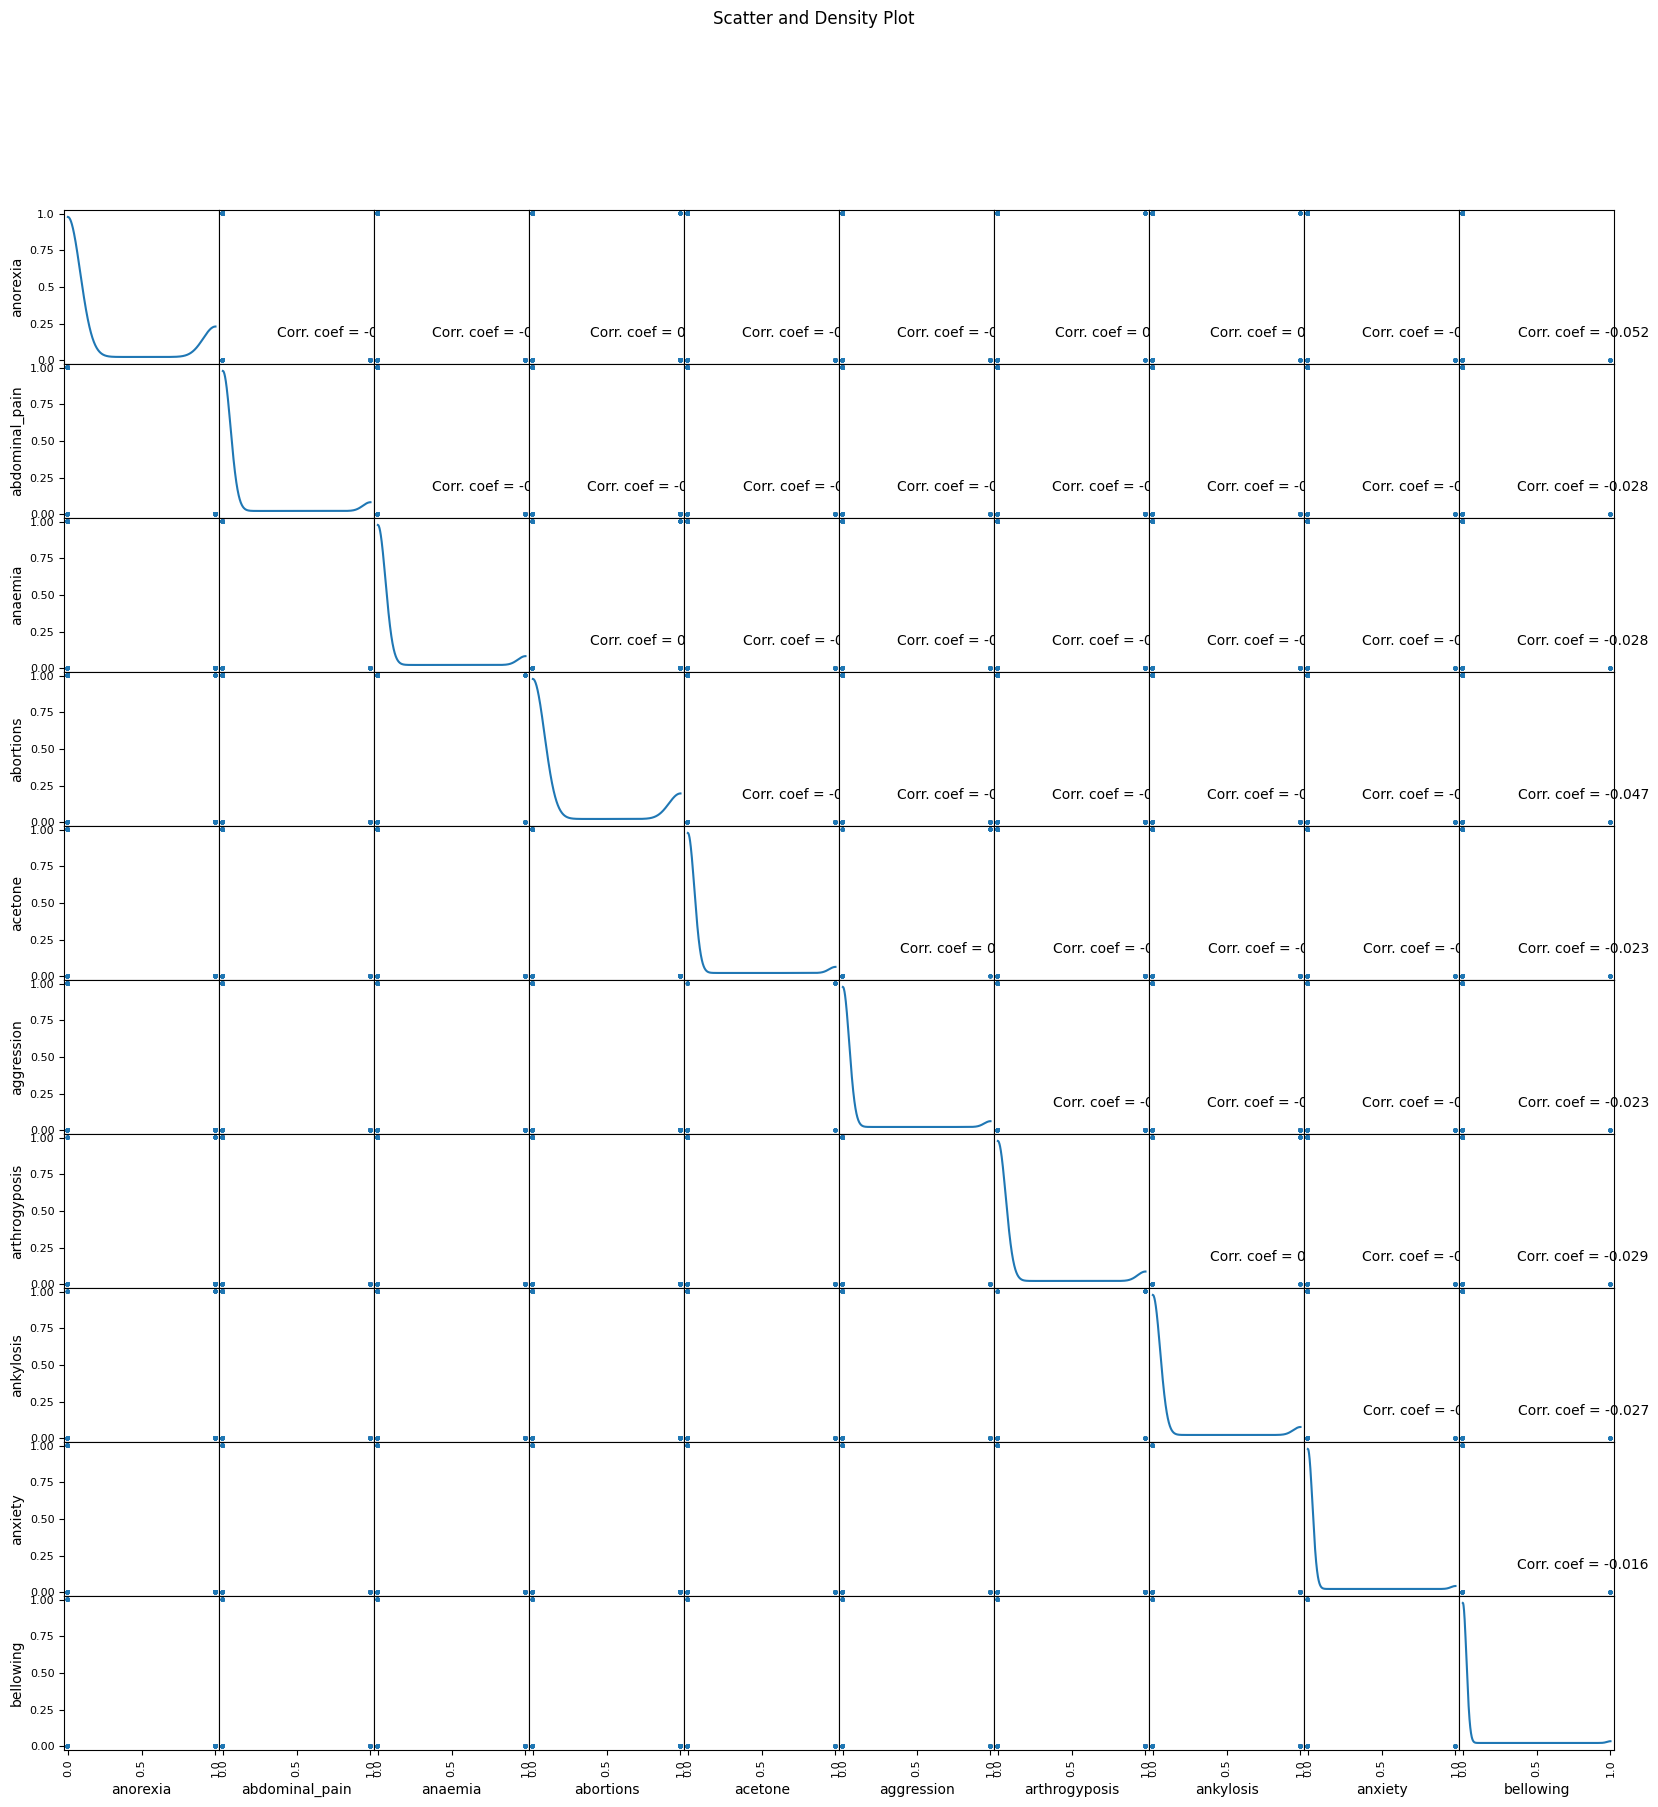

In [10]:
plotScatterMatrix(df, 20, 10)

In [11]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0            0               0        0          0        0           0   
1            0               0        0          0        0           0   
2            0               0        0          0        0           0   
3            0               0        0          0        0           0   
4            0               0        0          0        0           0   
...        ...             ...      ...        ...      ...         ...   
2039         0               0        0          0        0           0   
2040         0               0        0          0        0           0   
2041         0               0        0          0        0           0   
2042         0               0        0          0        0           0   
2043         0               0        0          0        0           0   

      arthrogyposis  ankylosis  anxiety  bellowing  ...  udder_swelling  \
0                 0     

In [12]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
2039         12
2040         12
2041         12
2042         12
2043         13

[2044 rows x 1 columns]


In [13]:
#Reading the Cattle testing Dataset .csv file
tr=pd.read_csv("testing.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
tr.head()

C:\Users\win11\AppData\Local\Temp\ipykernel_37044\2691340465.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tr.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,


,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4


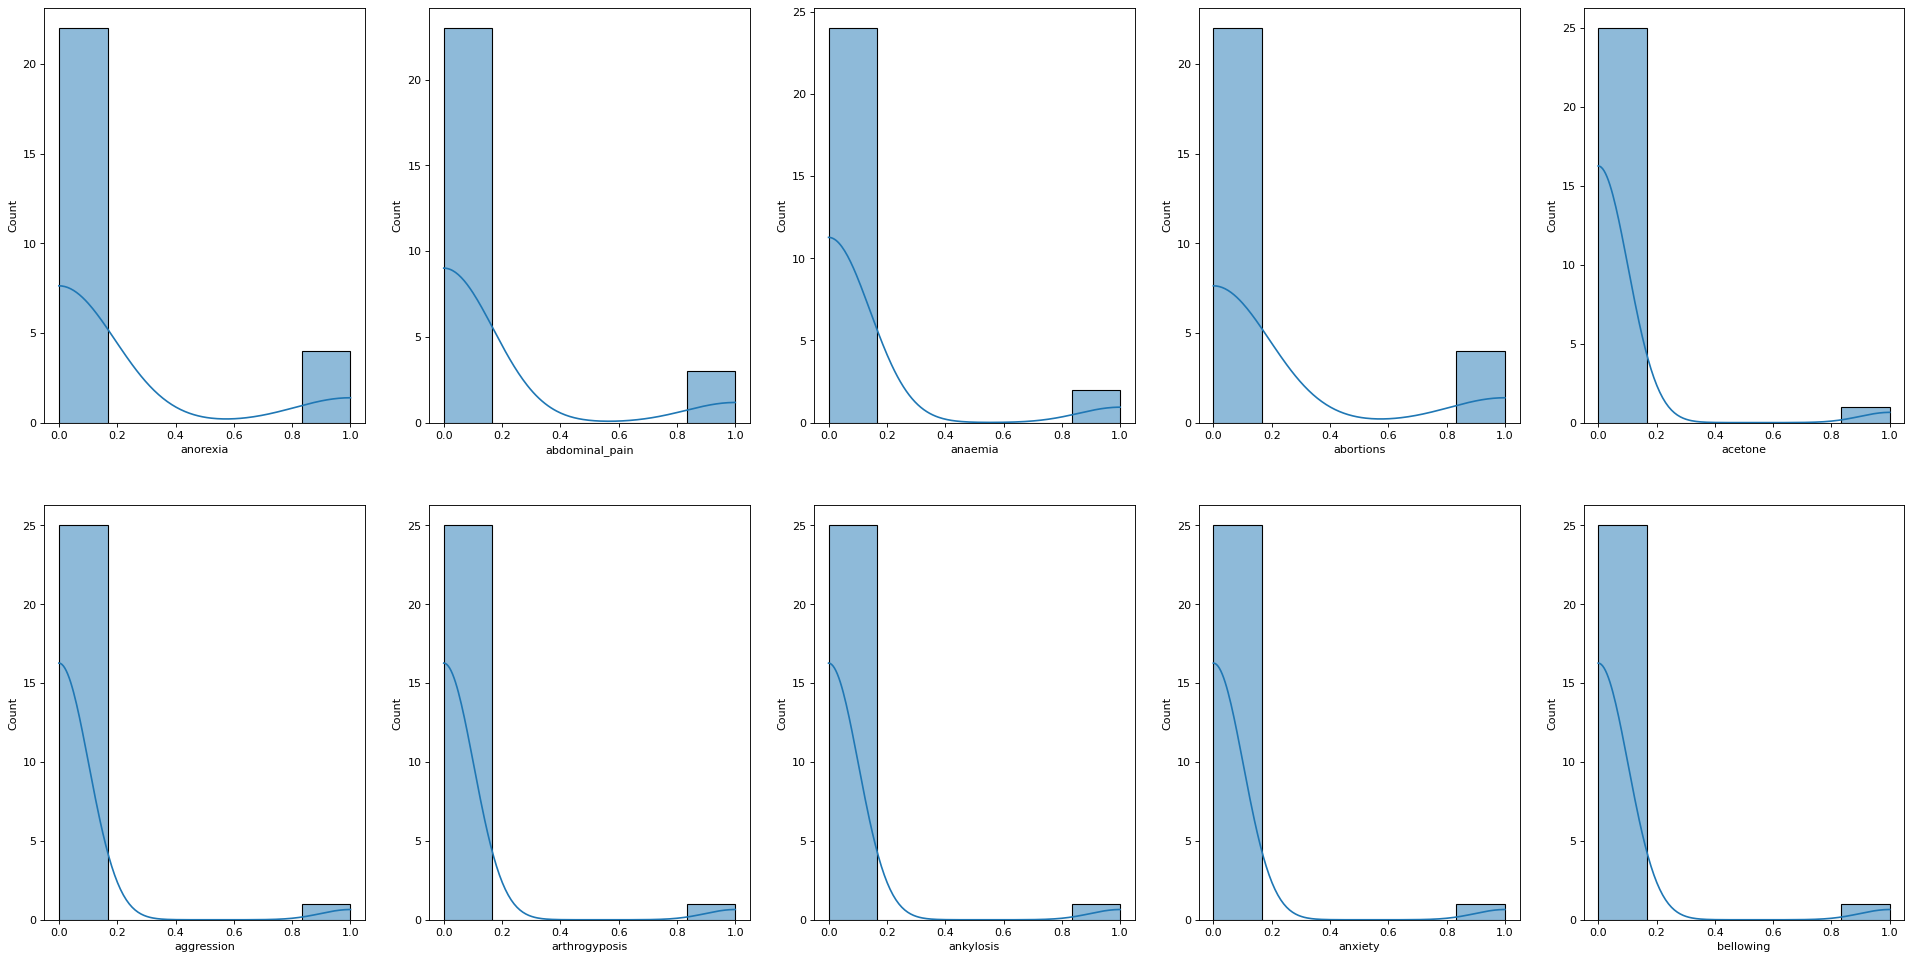

In [14]:
plotPerColumnDistribution(tr, 10, 5)

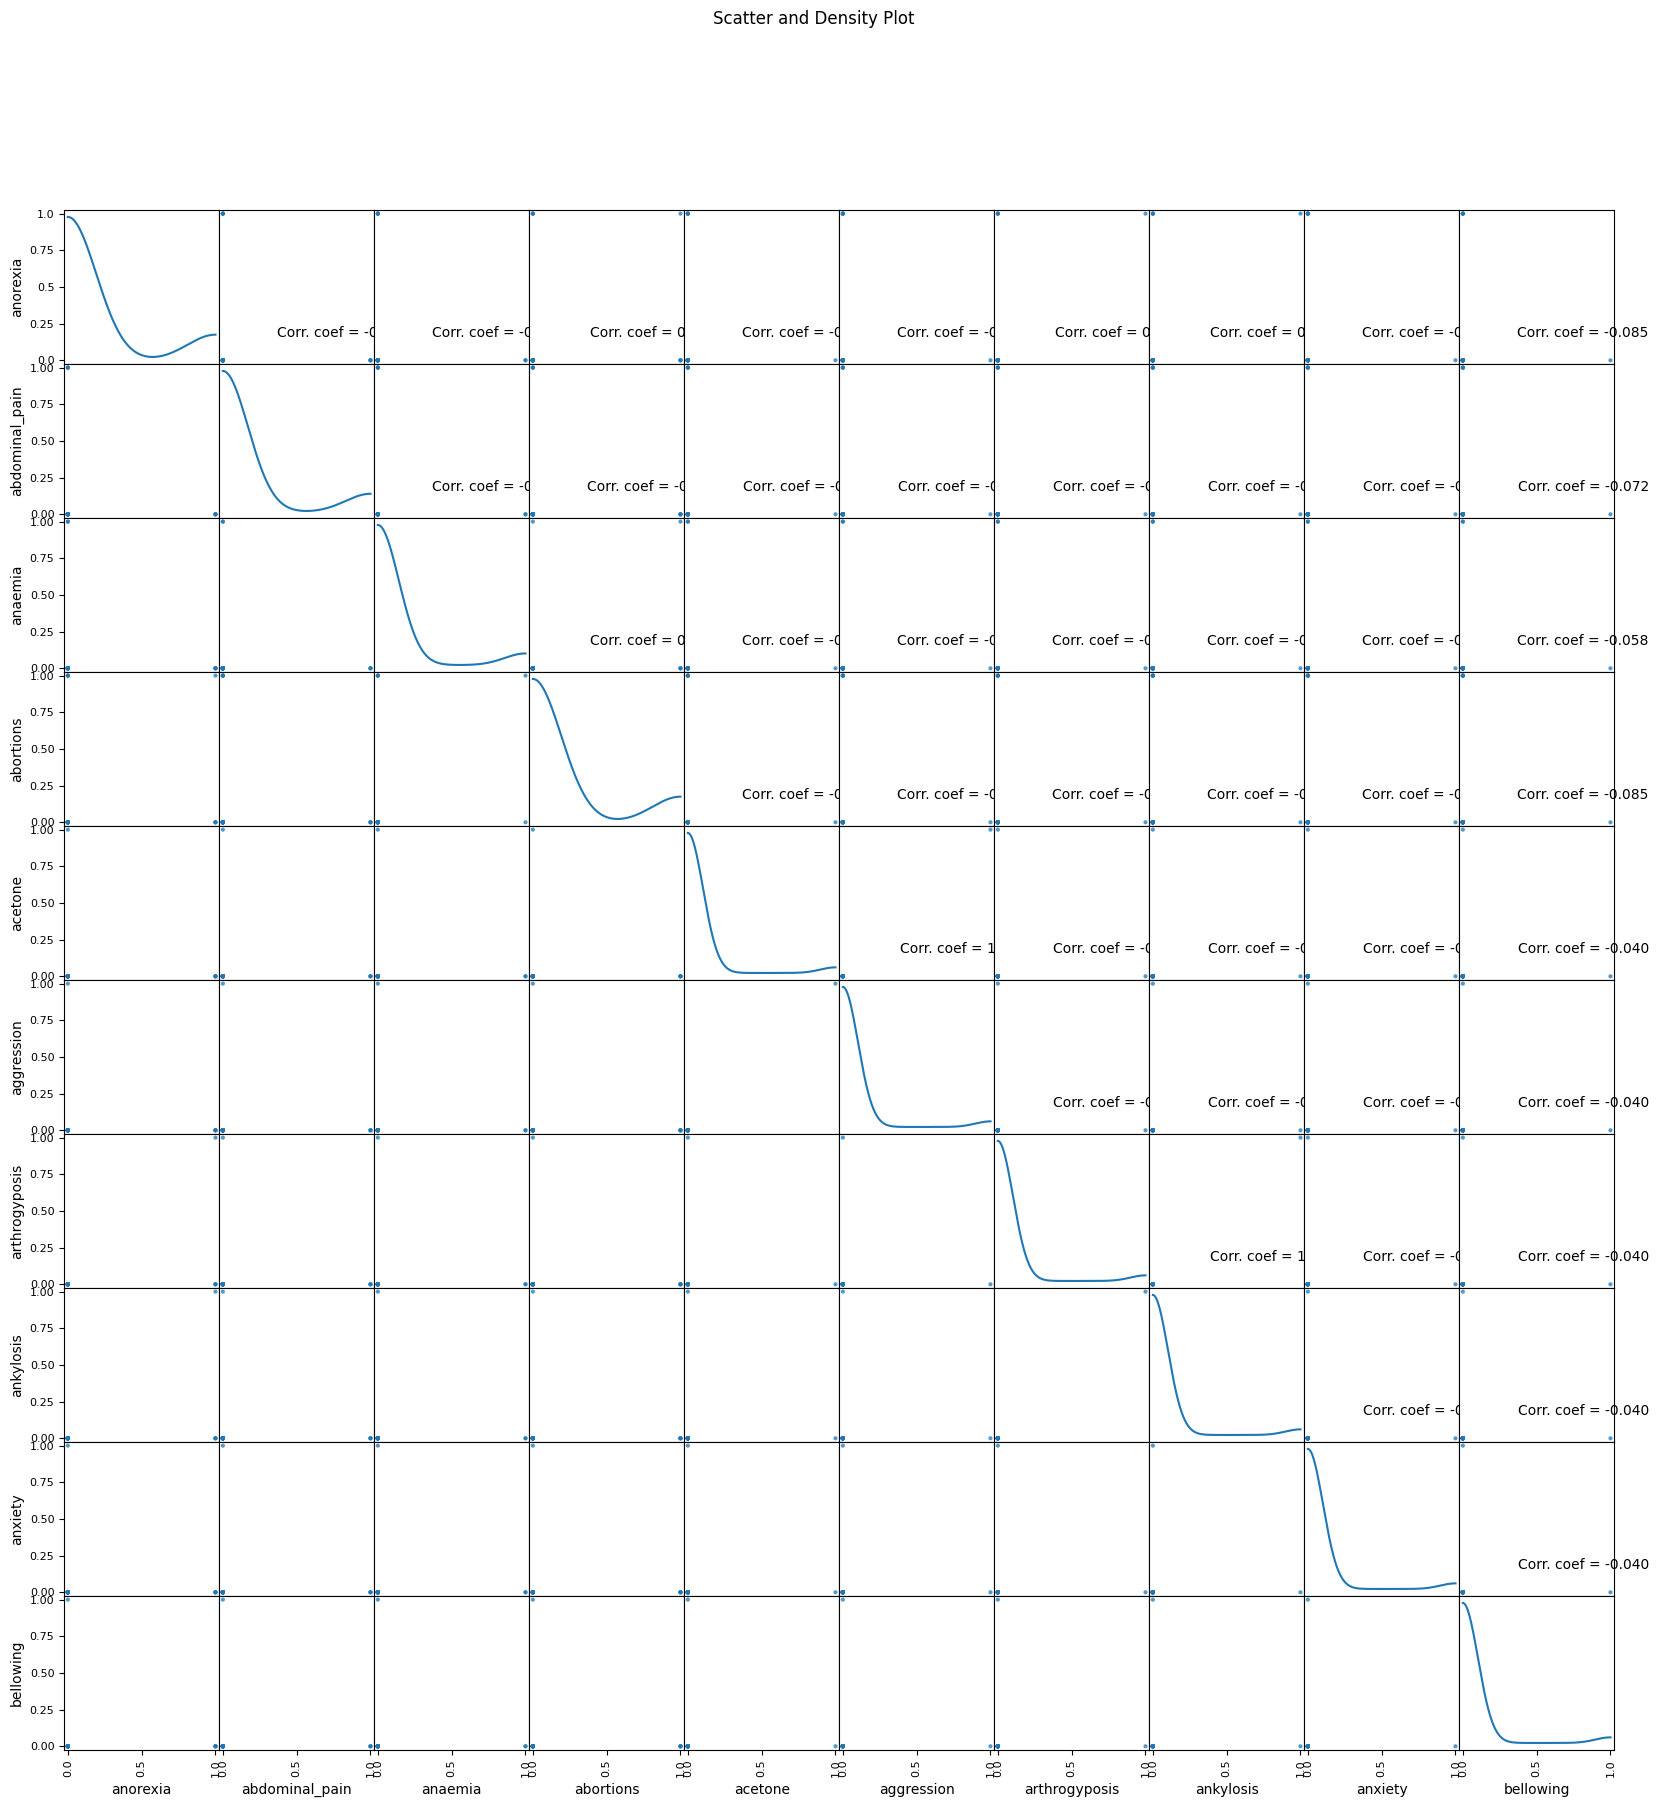

In [15]:
plotScatterMatrix(tr, 20, 10)

In [16]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0          0               0        0          0        0           0   
1          1               0        0          0        0           0   
2          0               0        0          0        0           0   
3          0               0        0          0        0           0   
4          0               0        0          0        0           0   
5          0               0        0          0        0           0   
6          0               1        0          0        0           0   
7          0               0        0          1        0           0   
8          0               0        1          0        0           0   
9          0               0        0          0        0           0   
10         0               0        0          0        0           0   
11         1               0        0          1        0           0   
12         0               0        0          0   

In [17]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25


In [18]:
#list1 = DF['prognosis'].unique()
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    print(x.values)
    y = x.keys()#storing nameof symptoms in y
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

# Decision Tree

Model saved as cattle_disease_model.pkl
Decision Tree
Accuracy
1.0
26.0
Confusion Matrix
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

c:\Users\win11\Desktop\Krishi-Dost\krishidost\backend\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


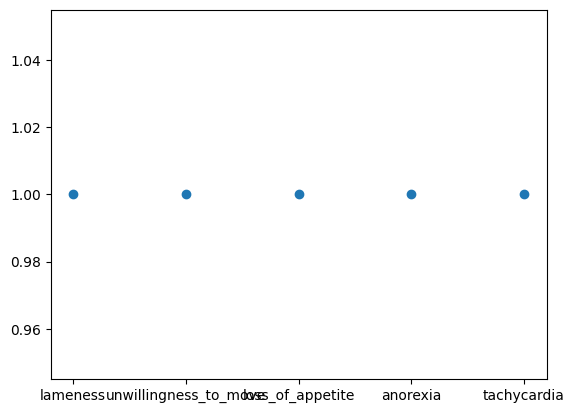

[76 70 61 65 64 63 68 71]
8
8


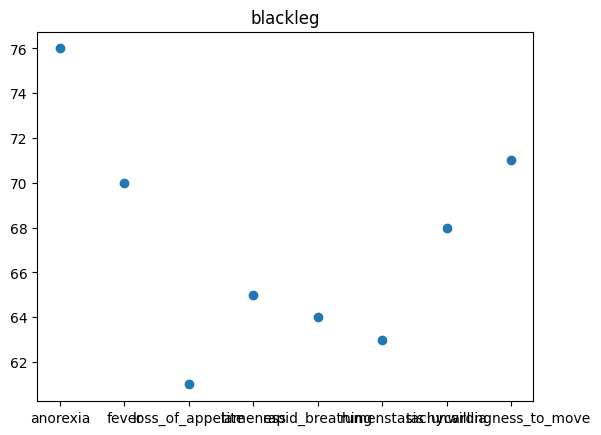

In [20]:
def decision_tree(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5):
    if len(Name) == 0:
        print("Kindly fill the Name")
        return None
    elif Symptom1 == "Select Here" or Symptom2 == "Select Here":
        print("Kindly fill at least the first two symptoms")
        return None
    else:
        from sklearn import tree
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        import sqlite3

        # Placeholder for the model training (Assuming X, y, X_test, y_test are already defined)
        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X, y)

        with open('cattle_disease_model.pkl', 'wb') as model_file:
            pickle.dump(clf3, model_file)

        print("Model saved as cattle_disease_model.pkl")

        
        def load_model():
            with open('cattle_disease_model.pkl', 'rb') as model_file:
                loaded_model = pickle.load(model_file)
            return loaded_model
        
        model = load_model()

        # Predict using the trained model
        y_pred = model.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion Matrix")  
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)

        # Process the symptoms
        psymptoms = [Symptom1, Symptom2, Symptom3, Symptom4, Symptom5]
        l2 = [0] * len(l1)  # Assuming l1 is a list of possible symptoms

        for k in range(len(l1)):
            for z in psymptoms:
                if z == l1[k]:
                    l2[k] = 1

        input_test = [l2]
        predict = model.predict(input_test)
        predicted = predict[0]

        # Identify the disease
        h = 'no'
        for a in range(len(disease)):
            if predicted == a:
                h = 'yes'
                break

        if h == 'yes':
            result = disease[a]
            print(f"Predicted Disease: {result}")
        else:
            result = "Not Found"
            print("Predicted Disease: Not Found")

        # Plotting functions (Assuming scatterinp and scatterplt are defined elsewhere)
        scatterinp(Symptom1, Symptom2, Symptom3, Symptom4, Symptom5)
        scatterplt(result)

# Example Usage
Name = input("Enter Cattle ID/Name: ")
Symptom1 = input("Enter Symptom 1: ")
Symptom2 = input("Enter Symptom 2: ")
Symptom3 = input("Enter Symptom 3: ")
Symptom4 = input("Enter Symptom 4: ")
Symptom5 = input("Enter Symptom 5 (optional): ")

decision_tree(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5)